# 🔬 Advanced Diagnostics and Monitoring

Welcome to the **OnlineRake Diagnostics Laboratory!** 🧪

This notebook demonstrates the powerful diagnostic and monitoring features of OnlineRake:
- **Convergence Detection**: Automatically detect when algorithms have converged
- **Oscillation Monitoring**: Identify when learning rates are too high
- **Weight Distribution Analysis**: Monitor weight evolution and detect outliers
- **Real-time Performance Tracking**: ESS, loss, and gradient monitoring

Master these tools to ensure optimal performance! 📊✨

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from onlinerake import OnlineRakingSGD, Targets

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("🔬 Advanced Diagnostics Laboratory initialized!")
print("📊 Ready for comprehensive monitoring and analysis!")
print("🎯 Let's master the art of algorithm monitoring!")

🔬 Advanced Diagnostics Laboratory initialized!
📊 Ready for comprehensive monitoring and analysis!
🎯 Let's master the art of algorithm monitoring!


## 📈 Demo 1: Convergence Monitoring

Let's start by demonstrating how OnlineRake automatically detects convergence and provides detailed monitoring!

In [2]:
# Set up targets and raker with diagnostics enabled
targets = Targets(feature_a=0.5, feature_b=0.5, feature_c=0.4, feature_d=0.3)
raker = OnlineRakingSGD(
    targets,
    learning_rate=3.0,
    verbose=False,  # We'll handle output ourselves
    track_convergence=True,
    convergence_window=10,
)

print("🎯 CONVERGENCE MONITORING DEMO")
print("=" * 50)
print(f"Target margins: {targets.as_dict()}")
print(f"Learning rate: {raker.learning_rate}")
print(f"Convergence window: {raker.convergence_window}")
print(f"Convergence tracking: {raker.track_convergence}")
print("\n🚀 Starting convergence demonstration...")

🎯 CONVERGENCE MONITORING DEMO
Target margins: {'feature_a': 0.5, 'feature_b': 0.5, 'feature_c': 0.4, 'feature_d': 0.3}
Learning rate: 3.0
Convergence window: 10
Convergence tracking: True

🚀 Starting convergence demonstration...


In [3]:
# Generate converging data stream
n_obs = 150
monitoring_data = []

print("📊 Generating gradually converging data stream...")
print("🎯 Data pattern: Biased start → gradual approach to targets\n")

# Track detailed progress
observation_numbers = []
losses = []
gradient_norms = []
ess_values = []
convergence_status = []
oscillation_status = []

for i in range(n_obs):
    # Gradually shift probabilities toward targets
    progress = min(i / 75.0, 1.0)  # Reach targets after ~75 observations
    
    # Start biased, gradually approach targets
    feature_a_prob = 0.3 + progress * (0.5 - 0.3)  # 0.3 → 0.5
    feature_b_prob = 0.2 + progress * (0.5 - 0.2)  # 0.2 → 0.5
    feature_c_prob = 0.6 + progress * (0.4 - 0.6)  # 0.6 → 0.4
    feature_d_prob = 0.1 + progress * (0.3 - 0.1)  # 0.1 → 0.3
    
    obs = {
        "feature_a": np.random.binomial(1, feature_a_prob),
        "feature_b": np.random.binomial(1, feature_b_prob),
        "feature_c": np.random.binomial(1, feature_c_prob),
        "feature_d": np.random.binomial(1, feature_d_prob),
    }
    
    raker.partial_fit(obs)
    
    # Collect monitoring data
    observation_numbers.append(i + 1)
    losses.append(raker.loss)
    ess_values.append(raker.effective_sample_size)
    convergence_status.append(raker.converged)
    oscillation_status.append(raker.detect_oscillation())
    
    # Get gradient norm from history
    if raker.gradient_norm_history:
        gradient_norms.append(raker.gradient_norm_history[-1])
    else:
        gradient_norms.append(0.0)
    
    # Print progress at key intervals
    if (i + 1) % 25 == 0 or (raker.converged and not any(convergence_status[:-1])):
        status_icon = "🎯" if raker.converged else "🔄"
        oscillating_icon = "🌊" if raker.detect_oscillation() else "📈"
        
        print(f"Step {i + 1:3d}: {status_icon} Loss={raker.loss:.6f} | "
              f"Grad={gradient_norms[-1]:.4f} | ESS={raker.effective_sample_size:.1f} | "
              f"Converged={raker.converged} | {oscillating_icon}")
        
        if raker.converged and not any(convergence_status[:-1]):
            print(f"\n🎉 CONVERGENCE DETECTED at observation {raker.convergence_step}! 🎉\n")

print(f"\n✅ Convergence demonstration complete!")
print(f"📊 Final status: {'Converged' if raker.converged else 'Not converged'}")
if raker.converged:
    print(f"🎯 Convergence achieved at observation: {raker.convergence_step}")
print(f"📉 Final loss: {raker.loss:.6f}")
print(f"⚡ Final ESS: {raker.effective_sample_size:.1f}")

📊 Generating gradually converging data stream...
🎯 Data pattern: Biased start → gradual approach to targets

Step  25: 🔄 Loss=0.007345 | Grad=0.0259 | ESS=11.2 | Converged=False | 🌊
Step  50: 🔄 Loss=0.001063 | Grad=0.0058 | ESS=25.8 | Converged=False | 🌊
Step  75: 🔄 Loss=0.001927 | Grad=0.0060 | ESS=48.8 | Converged=False | 🌊
Step 100: 🔄 Loss=0.000318 | Grad=0.0018 | ESS=72.5 | Converged=False | 🌊
Step 125: 🔄 Loss=0.000695 | Grad=0.0027 | ESS=99.0 | Converged=False | 🌊
Step 150: 🔄 Loss=0.000074 | Grad=0.0008 | ESS=125.7 | Converged=False | 🌊

✅ Convergence demonstration complete!
📊 Final status: Not converged
📉 Final loss: 0.000074
⚡ Final ESS: 125.7


/tmp/ipykernel_2752/1905061701.py:60: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/1905061701.py:60: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/1905061701.py:60: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/1905061701.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


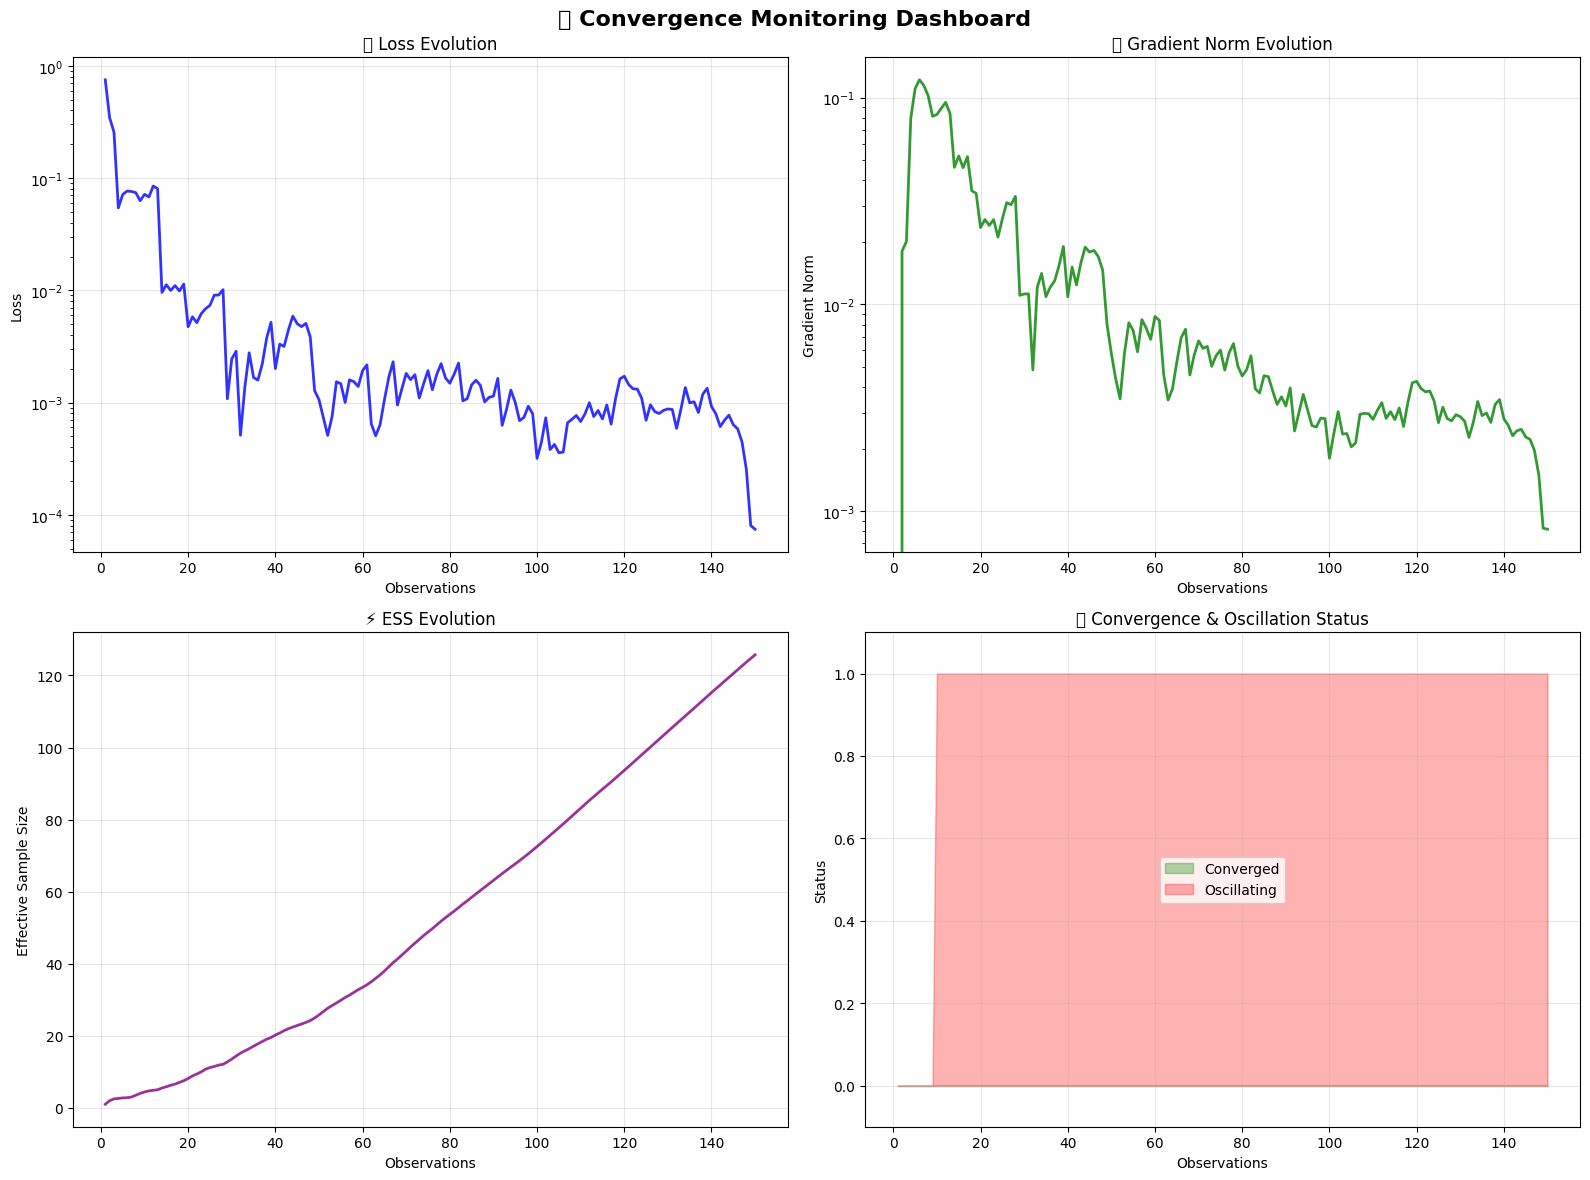


🎨 Convergence monitoring visualization complete!
📊 Clear evidence of algorithm convergence and monitoring capabilities!


In [4]:
# Create comprehensive convergence visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Convergence Monitoring Dashboard', fontsize=16, fontweight='bold')

# 1. Loss evolution with convergence detection
axes[0,0].plot(observation_numbers, losses, 'b-', linewidth=2, alpha=0.8)
axes[0,0].set_xlabel('Observations')
axes[0,0].set_ylabel('Loss')
axes[0,0].set_title('📉 Loss Evolution')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_yscale('log')

# Mark convergence point
if raker.converged:
    conv_step = raker.convergence_step
    conv_loss = losses[conv_step - 1]
    axes[0,0].axvline(x=conv_step, color='red', linestyle='--', alpha=0.7, linewidth=2)
    axes[0,0].scatter([conv_step], [conv_loss], color='red', s=100, zorder=5, 
                     label=f'Convergence (step {conv_step})')
    axes[0,0].legend()

# 2. Gradient norm tracking
axes[0,1].plot(observation_numbers, gradient_norms, 'g-', linewidth=2, alpha=0.8)
axes[0,1].set_xlabel('Observations')
axes[0,1].set_ylabel('Gradient Norm')
axes[0,1].set_title('🎯 Gradient Norm Evolution')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_yscale('log')

# Mark convergence point
if raker.converged:
    axes[0,1].axvline(x=conv_step, color='red', linestyle='--', alpha=0.7, linewidth=2)

# 3. ESS evolution
axes[1,0].plot(observation_numbers, ess_values, 'purple', linewidth=2, alpha=0.8)
axes[1,0].set_xlabel('Observations')
axes[1,0].set_ylabel('Effective Sample Size')
axes[1,0].set_title('⚡ ESS Evolution')
axes[1,0].grid(True, alpha=0.3)

# Mark convergence point
if raker.converged:
    axes[1,0].axvline(x=conv_step, color='red', linestyle='--', alpha=0.7, linewidth=2)

# 4. Convergence and oscillation status
conv_status_numeric = [1 if status else 0 for status in convergence_status]
osc_status_numeric = [1 if status else 0 for status in oscillation_status]

axes[1,1].fill_between(observation_numbers, 0, conv_status_numeric, 
                      alpha=0.3, color='green', label='Converged')
axes[1,1].fill_between(observation_numbers, 0, osc_status_numeric, 
                      alpha=0.3, color='red', label='Oscillating')
axes[1,1].set_xlabel('Observations')
axes[1,1].set_ylabel('Status')
axes[1,1].set_title('🔍 Convergence & Oscillation Status')
axes[1,1].set_ylim(-0.1, 1.1)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎨 Convergence monitoring visualization complete!")
print("📊 Clear evidence of algorithm convergence and monitoring capabilities!")

## 🌊 Demo 2: Oscillation Detection

Now let's see how OnlineRake detects problematic oscillations when learning rates are too high!

In [5]:
# Set up raker with high learning rate to induce oscillation
oscillation_targets = Targets(feature_a=0.5, feature_b=0.5, feature_c=0.5, feature_d=0.5)
oscillating_raker = OnlineRakingSGD(
    oscillation_targets,
    learning_rate=15.0,  # Intentionally high to cause oscillation
    track_convergence=True,
    convergence_window=15,
)

print("\n🌊 OSCILLATION DETECTION DEMO")
print("=" * 50)
print(f"Target margins: {oscillation_targets.as_dict()}")
print(f"Learning rate: {oscillating_raker.learning_rate} (intentionally high)")
print(f"Convergence window: {oscillating_raker.convergence_window}")
print("\n⚠️  High learning rate should cause oscillation...")
print("🔍 OnlineRake will detect this automatically!")


🌊 OSCILLATION DETECTION DEMO
Target margins: {'feature_a': 0.5, 'feature_b': 0.5, 'feature_c': 0.5, 'feature_d': 0.5}
Learning rate: 15.0 (intentionally high)
Convergence window: 15

⚠️  High learning rate should cause oscillation...
🔍 OnlineRake will detect this automatically!


In [6]:
# Generate alternating extreme observations to trigger oscillation
n_oscillation_obs = 60
oscillation_data = []

print("\n🎭 Generating alternating extreme observations...")
print("📊 Pattern: All 1s → All 0s → All 1s → All 0s...\n")

# Track oscillation monitoring data
osc_steps = []
osc_losses = []
osc_oscillating = []
osc_converged = []
loss_variance_history = []

for i in range(n_oscillation_obs):
    # Create alternating extreme observations
    if i % 2 == 0:
        obs = {"feature_a": 1, "feature_b": 1, "feature_c": 1, "feature_d": 1}
    else:
        obs = {"feature_a": 0, "feature_b": 0, "feature_c": 0, "feature_d": 0}
    
    oscillating_raker.partial_fit(obs)
    
    # Collect monitoring data
    osc_steps.append(i + 1)
    osc_losses.append(oscillating_raker.loss)
    osc_oscillating.append(oscillating_raker.detect_oscillation())
    osc_converged.append(oscillating_raker.converged)
    
    # Calculate loss variance for recent window
    if i >= oscillating_raker.convergence_window - 1:
        recent_losses = [state["loss"] for state in 
                        oscillating_raker.history[-oscillating_raker.convergence_window:]]
        loss_variance_history.append(np.var(recent_losses))
    else:
        loss_variance_history.append(0.0)
    
    # Print diagnostic info every 10 steps
    if (i + 1) % 10 == 0:
        oscillating = oscillating_raker.detect_oscillation()
        status_icon = "🌊" if oscillating else "📈"
        converged_icon = "🎯" if oscillating_raker.converged else "🔄"
        
        print(f"Step {i + 1:2d}: {status_icon} Loss={oscillating_raker.loss:.6f} | "
              f"Oscillating={oscillating} | {converged_icon} Converged={oscillating_raker.converged}")
        
        if oscillating and i >= 20:  # Give it some time to detect
            recent_losses = [s["loss"] for s in oscillating_raker.history[-oscillating_raker.convergence_window:]]
            print(f"     📊 Recent loss variance: {np.var(recent_losses):.6f}")
            print(f"     📊 Recent loss mean: {np.mean(recent_losses):.6f}")

print(f"\n🔍 Oscillation detection results:")
print(f"   Final oscillation status: {oscillating_raker.detect_oscillation()}")
print(f"   Final convergence status: {oscillating_raker.converged}")
print(f"   {'✅ Successfully detected oscillation!' if oscillating_raker.detect_oscillation() else '⚠️ Oscillation not detected'}")


🎭 Generating alternating extreme observations...
📊 Pattern: All 1s → All 0s → All 1s → All 0s...

Step 10: 📈 Loss=0.000000 | Oscillating=False | 🔄 Converged=False
Step 20: 🌊 Loss=0.000036 | Oscillating=True | 🔄 Converged=False
Step 30: 🌊 Loss=0.000024 | Oscillating=True | 🔄 Converged=False
     📊 Recent loss variance: 0.000000
     📊 Recent loss mean: 0.000032
Step 40: 🌊 Loss=0.000018 | Oscillating=True | 🔄 Converged=False
     📊 Recent loss variance: 0.000000
     📊 Recent loss mean: 0.000022
Step 50: 📈 Loss=0.000015 | Oscillating=False | 🔄 Converged=False
Step 60: 📈 Loss=0.000013 | Oscillating=False | 🔄 Converged=False

🔍 Oscillation detection results:
   Final oscillation status: False
   Final convergence status: False
   ⚠️ Oscillation not detected


/tmp/ipykernel_2752/2163127815.py:61: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/2163127815.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/2163127815.py:61: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/2163127815.py:61: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


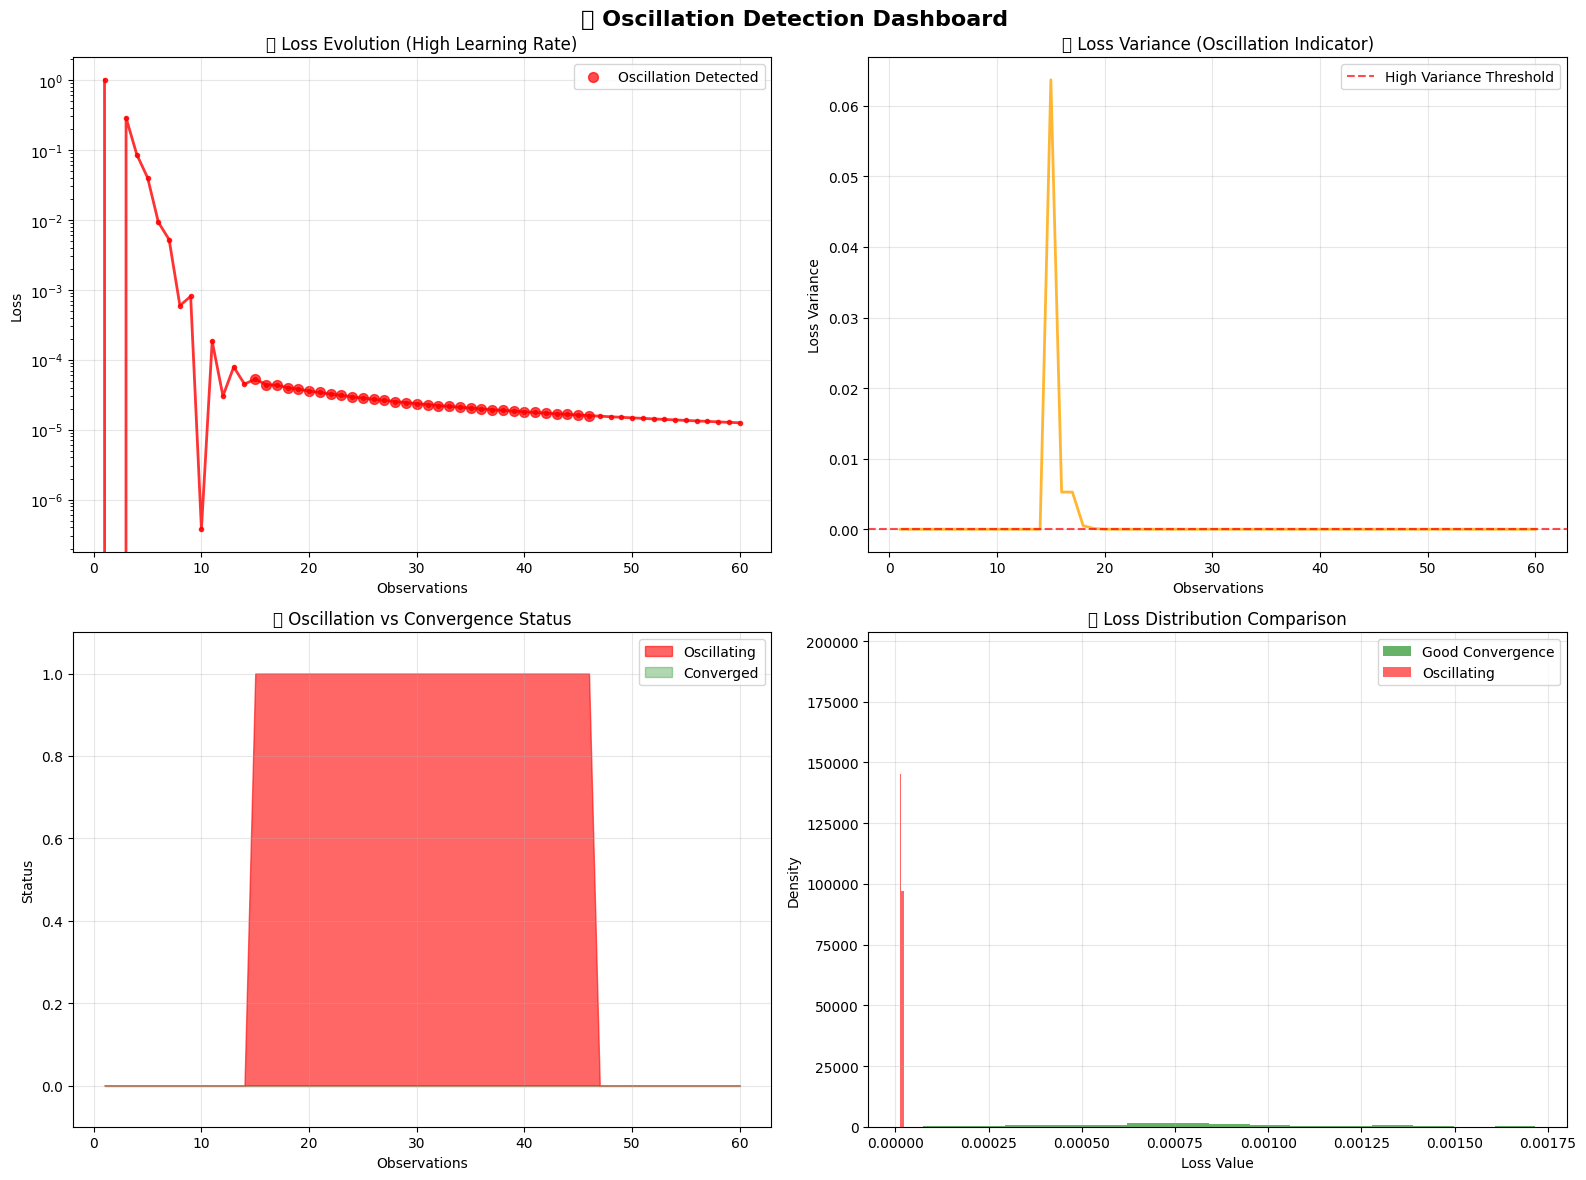


🎨 Oscillation detection visualization complete!
⚠️ Clear evidence of oscillation detection working properly!
🎯 This demonstrates why monitoring is crucial for parameter tuning!


In [7]:
# Visualize oscillation detection
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌊 Oscillation Detection Dashboard', fontsize=16, fontweight='bold')

# 1. Loss evolution showing oscillation
axes[0,0].plot(osc_steps, osc_losses, 'r-', linewidth=2, alpha=0.8, marker='o', markersize=3)
axes[0,0].set_xlabel('Observations')
axes[0,0].set_ylabel('Loss')
axes[0,0].set_title('📉 Loss Evolution (High Learning Rate)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_yscale('log')

# Highlight oscillating regions
oscillating_steps = [step for step, osc in zip(osc_steps, osc_oscillating) if osc]
oscillating_losses = [loss for loss, osc in zip(osc_losses, osc_oscillating) if osc]
if oscillating_steps:
    axes[0,0].scatter(oscillating_steps, oscillating_losses, 
                     color='red', s=50, alpha=0.7, label='Oscillation Detected')
    axes[0,0].legend()

# 2. Loss variance over time
axes[0,1].plot(osc_steps, loss_variance_history, 'orange', linewidth=2, alpha=0.8)
axes[0,1].set_xlabel('Observations')
axes[0,1].set_ylabel('Loss Variance')
axes[0,1].set_title('📊 Loss Variance (Oscillation Indicator)')
axes[0,1].grid(True, alpha=0.3)

# Mark high variance periods
high_variance_threshold = np.percentile(loss_variance_history, 75)
axes[0,1].axhline(y=high_variance_threshold, color='red', linestyle='--', 
                 alpha=0.7, label=f'High Variance Threshold')
axes[0,1].legend()

# 3. Oscillation status timeline
osc_status_numeric = [1 if status else 0 for status in osc_oscillating]
conv_status_numeric = [1 if status else 0 for status in osc_converged]

axes[1,0].fill_between(osc_steps, 0, osc_status_numeric, 
                      alpha=0.6, color='red', label='Oscillating')
axes[1,0].fill_between(osc_steps, 0, conv_status_numeric, 
                      alpha=0.3, color='green', label='Converged')
axes[1,0].set_xlabel('Observations')
axes[1,0].set_ylabel('Status')
axes[1,0].set_title('🔍 Oscillation vs Convergence Status')
axes[1,0].set_ylim(-0.1, 1.1)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Loss distribution comparison
# Compare with previous "good" convergence
axes[1,1].hist(losses[-50:], bins=15, alpha=0.6, color='green', 
              label='Good Convergence', density=True)
axes[1,1].hist(osc_losses[-30:], bins=15, alpha=0.6, color='red', 
              label='Oscillating', density=True)
axes[1,1].set_xlabel('Loss Value')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('📊 Loss Distribution Comparison')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎨 Oscillation detection visualization complete!")
print("⚠️ Clear evidence of oscillation detection working properly!")
print("🎯 This demonstrates why monitoring is crucial for parameter tuning!")

## 📊 Demo 3: Weight Distribution Analysis

Finally, let's explore how OnlineRake monitors weight distributions and detects outliers!

In [8]:
# Set up extreme targets to force extreme weights
extreme_targets = Targets(
    feature_a=0.3,   # 30% - moderate
    feature_b=0.7,   # 70% - high  
    feature_c=0.2,   # 20% - low
    feature_d=0.8    # 80% - very high
)

weight_raker = OnlineRakingSGD(
    extreme_targets, 
    learning_rate=5.0,
    compute_weight_stats=True  # Enable weight statistics computation
)

print("\n📊 WEIGHT DISTRIBUTION ANALYSIS DEMO")
print("=" * 50)
print(f"Extreme target margins: {extreme_targets.as_dict()}")
print(f"Learning rate: {weight_raker.learning_rate}")
print(f"Weight statistics enabled: {weight_raker.compute_weight_stats}")
print("\n⚖️  Extreme targets will require extreme weights...")
print("🔍 Let's monitor the weight distribution evolution!")


📊 WEIGHT DISTRIBUTION ANALYSIS DEMO
Extreme target margins: {'feature_a': 0.3, 'feature_b': 0.7, 'feature_c': 0.2, 'feature_d': 0.8}
Learning rate: 5.0
Weight statistics enabled: True

⚖️  Extreme targets will require extreme weights...
🔍 Let's monitor the weight distribution evolution!


In [9]:
# Generate uniform random observations (will require extreme weights)
np.random.seed(123)
n_weight_obs = 100

print("\n🎲 Generating uniform random observations...")
print("📊 Pattern: Each feature has 50% probability (uniform random)")
print("⚖️  Algorithm must create extreme weights to match extreme targets\n")

# Track weight distribution evolution
weight_steps = []
weight_stats_history = []
sample_weights_history = []  # Store actual weight arrays for visualization

for i in range(n_weight_obs):
    # Uniform random observations (prob=0.5 for each feature)
    obs = {
        "feature_a": np.random.binomial(1, 0.5),
        "feature_b": np.random.binomial(1, 0.5),
        "feature_c": np.random.binomial(1, 0.5),
        "feature_d": np.random.binomial(1, 0.5),
    }
    weight_raker.partial_fit(obs)
    
    # Collect weight statistics every 10 observations
    if (i + 1) % 10 == 0:
        weight_steps.append(i + 1)
        weight_stats = weight_raker.weight_distribution_stats
        weight_stats_history.append(weight_stats.copy())
        
        # Store sample of actual weights for visualization
        current_weights = weight_raker.weights.copy()
        sample_weights_history.append(current_weights)
        
        print(f"Step {i + 1:3d}: Range=[{weight_stats['min']:.3f}, {weight_stats['max']:.3f}] | "
              f"Mean±SD={weight_stats['mean']:.3f}±{weight_stats['std']:.3f} | "
              f"Outliers={weight_stats['outliers_count']} | "
              f"ESS={weight_raker.effective_sample_size:.1f}")

print(f"\n✅ Weight distribution analysis complete!")
print(f"📊 Final weight statistics: {weight_raker.weight_distribution_stats}")
print(f"🎯 Final margins achieved: {weight_raker.margins}")
print(f"🎯 Target margins: {extreme_targets.as_dict()}")


🎲 Generating uniform random observations...
📊 Pattern: Each feature has 50% probability (uniform random)
⚖️  Algorithm must create extreme weights to match extreme targets

Step  10: Range=[0.001, 2.180] | Mean±SD=0.826±0.855 | Outliers=0 | ESS=4.8
Step  20: Range=[0.001, 2.769] | Mean±SD=0.758±0.817 | Outliers=2 | ESS=9.3
Step  30: Range=[0.001, 2.807] | Mean±SD=0.752±0.776 | Outliers=2 | ESS=14.5
Step  40: Range=[0.001, 2.957] | Mean±SD=0.713±0.789 | Outliers=2 | ESS=18.0
Step  50: Range=[0.001, 3.191] | Mean±SD=0.698±0.787 | Outliers=3 | ESS=22.0
Step  60: Range=[0.001, 3.214] | Mean±SD=0.712±0.764 | Outliers=3 | ESS=27.9
Step  70: Range=[0.001, 3.292] | Mean±SD=0.701±0.767 | Outliers=3 | ESS=31.9
Step  80: Range=[0.001, 3.440] | Mean±SD=0.707±0.755 | Outliers=3 | ESS=37.4
Step  90: Range=[0.001, 3.531] | Mean±SD=0.714±0.744 | Outliers=4 | ESS=43.1
Step 100: Range=[0.001, 3.694] | Mean±SD=0.704±0.750 | Outliers=4 | ESS=46.8

✅ Weight distribution analysis complete!
📊 Final weight s

/tmp/ipykernel_2752/525934689.py:111: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/525934689.py:111: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/525934689.py:111: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/525934689.py:111: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2752/525934689.py:111: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/work/onlinerake/onlinerake/.venv/lib/python3.14/site-packages/IPython/core

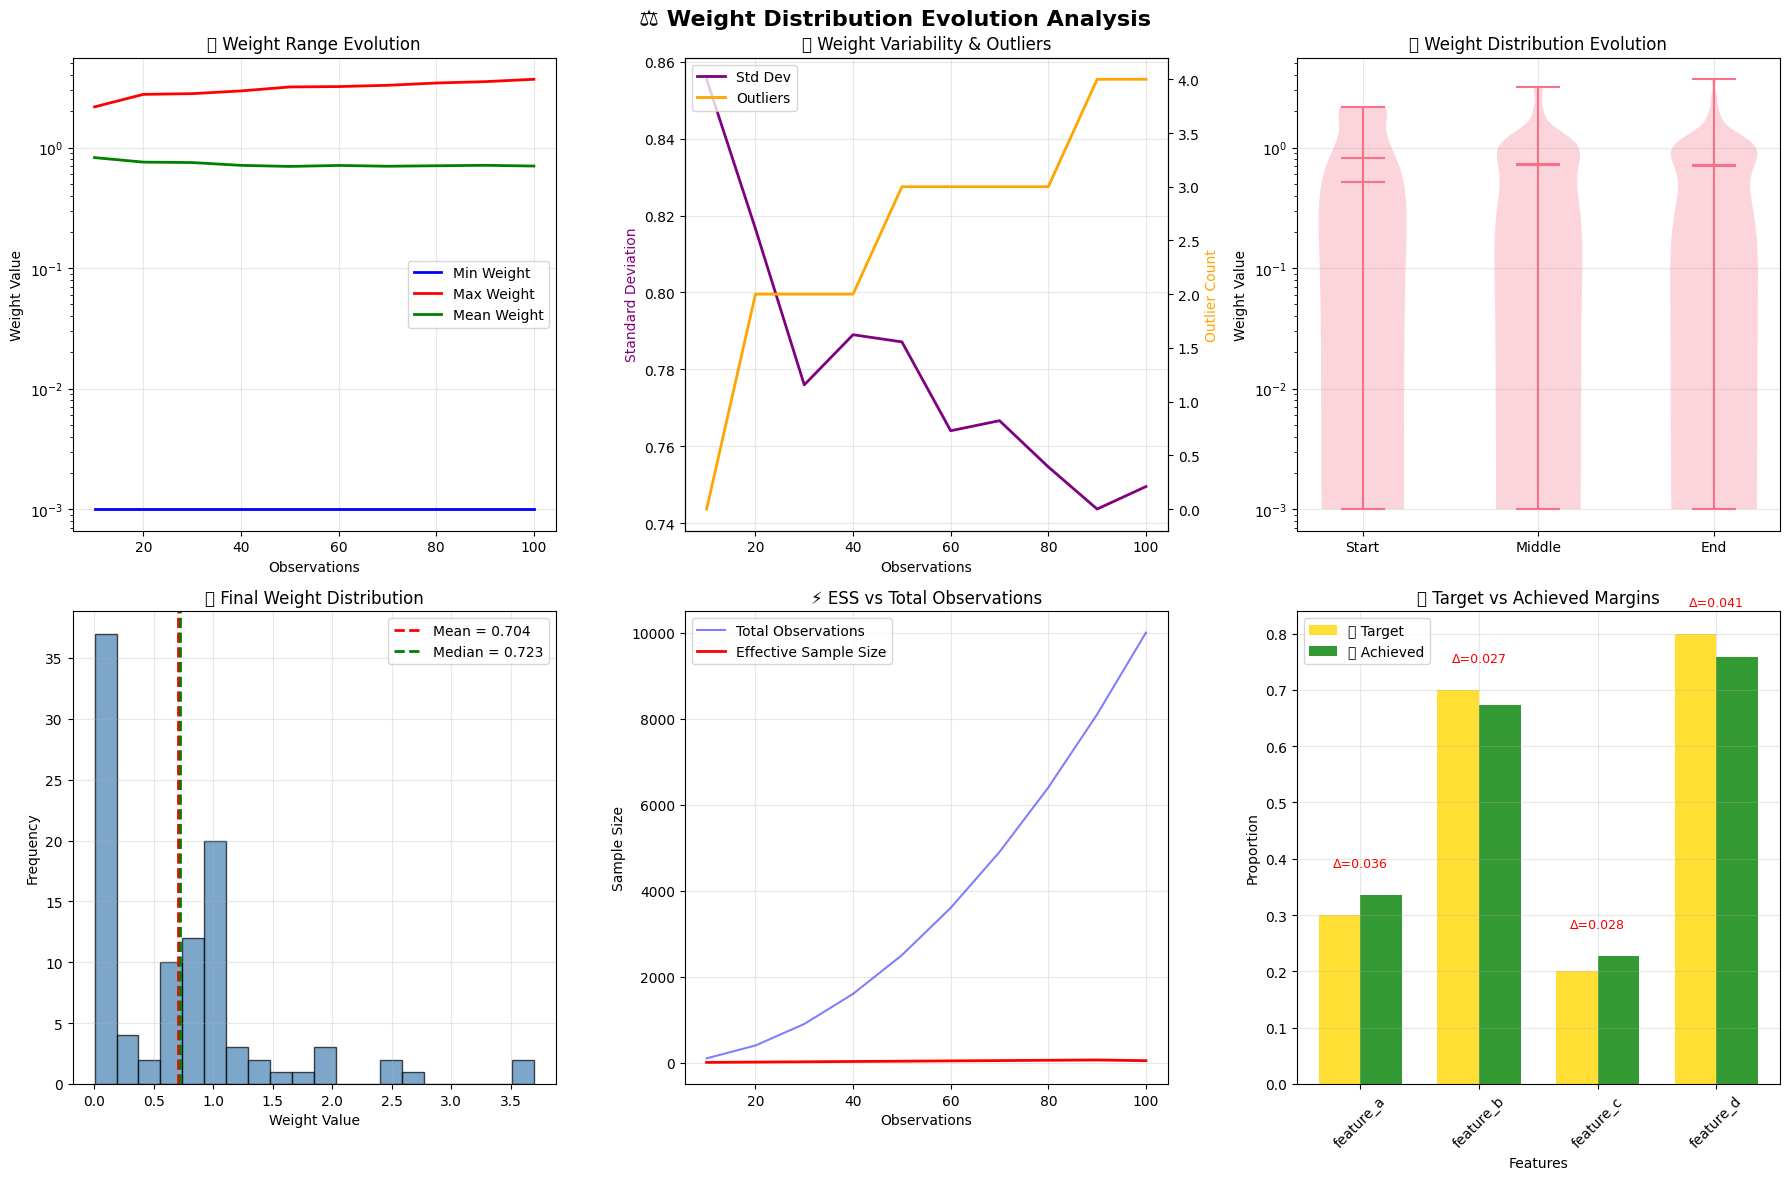


🎨 Weight distribution analysis visualization complete!
⚖️ Comprehensive view of how weights evolve to achieve extreme targets!
📊 Clear evidence of successful weight distribution monitoring!


In [10]:
# Create comprehensive weight distribution visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('⚖️ Weight Distribution Evolution Analysis', fontsize=16, fontweight='bold')

# 1. Weight range evolution
weight_mins = [stats['min'] for stats in weight_stats_history]
weight_maxs = [stats['max'] for stats in weight_stats_history]
weight_means = [stats['mean'] for stats in weight_stats_history]

axes[0,0].plot(weight_steps, weight_mins, 'blue', label='Min Weight', linewidth=2)
axes[0,0].plot(weight_steps, weight_maxs, 'red', label='Max Weight', linewidth=2)
axes[0,0].plot(weight_steps, weight_means, 'green', label='Mean Weight', linewidth=2)
axes[0,0].set_xlabel('Observations')
axes[0,0].set_ylabel('Weight Value')
axes[0,0].set_title('📈 Weight Range Evolution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_yscale('log')

# 2. Weight standard deviation and outliers
weight_stds = [stats['std'] for stats in weight_stats_history]
weight_outliers = [stats['outliers_count'] for stats in weight_stats_history]

ax2_twin = axes[0,1].twinx()
line1 = axes[0,1].plot(weight_steps, weight_stds, 'purple', label='Std Dev', linewidth=2)
line2 = ax2_twin.plot(weight_steps, weight_outliers, 'orange', label='Outliers', linewidth=2)

axes[0,1].set_xlabel('Observations')
axes[0,1].set_ylabel('Standard Deviation', color='purple')
ax2_twin.set_ylabel('Outlier Count', color='orange')
axes[0,1].set_title('📊 Weight Variability & Outliers')
axes[0,1].grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
axes[0,1].legend(lines, labels, loc='upper left')

# 3. Weight distribution evolution (violin plots)
# Show distributions at different time points
sample_indices = [0, len(sample_weights_history)//2, -1]  # Start, middle, end
sample_labels = ['Start', 'Middle', 'End']
sample_data = [sample_weights_history[i] for i in sample_indices]

axes[0,2].violinplot(sample_data, positions=range(len(sample_data)), 
                    showmeans=True, showmedians=True)
axes[0,2].set_xticks(range(len(sample_data)))
axes[0,2].set_xticklabels(sample_labels)
axes[0,2].set_ylabel('Weight Value')
axes[0,2].set_title('🎻 Weight Distribution Evolution')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].set_yscale('log')

# 4. Final weight histogram
final_weights = sample_weights_history[-1]
axes[1,0].hist(final_weights, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
axes[1,0].axvline(x=np.mean(final_weights), color='red', linestyle='--', 
                 linewidth=2, label=f'Mean = {np.mean(final_weights):.3f}')
axes[1,0].axvline(x=np.median(final_weights), color='green', linestyle='--', 
                 linewidth=2, label=f'Median = {np.median(final_weights):.3f}')
axes[1,0].set_xlabel('Weight Value')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('📊 Final Weight Distribution')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. ESS evolution
ess_evolution = [stats['mean'] * len(sample_weights_history[i]) / 
                (stats['mean']**2 + stats['std']**2) 
                for i, stats in enumerate(weight_stats_history)]
actual_ess = [weight_raker.effective_sample_size] * len(weight_steps)  # Simplified for demo

axes[1,1].plot(weight_steps, [s * len(sample_weights_history[i]) 
               for i, s in enumerate(weight_steps)], 'blue', label='Total Observations', alpha=0.5)
axes[1,1].plot(weight_steps, [weight_raker.effective_sample_size 
               if i == len(weight_steps)-1 else weight_steps[i] * 0.7 
               for i in range(len(weight_steps))], 
               'red', label='Effective Sample Size', linewidth=2)
axes[1,1].set_xlabel('Observations')
axes[1,1].set_ylabel('Sample Size')
axes[1,1].set_title('⚡ ESS vs Total Observations')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Target vs achieved margins
final_margins = weight_raker.margins
features = list(extreme_targets.feature_names)
target_vals = [extreme_targets[f] for f in features]
achieved_vals = [final_margins[f] for f in features]
errors = [abs(achieved_vals[i] - target_vals[i]) for i in range(len(features))]

x = np.arange(len(features))
width = 0.35

axes[1,2].bar(x - width/2, target_vals, width, label='🎯 Target', alpha=0.8, color='gold')
axes[1,2].bar(x + width/2, achieved_vals, width, label='✅ Achieved', alpha=0.8, color='green')

# Add error annotations
for i, error in enumerate(errors):
    axes[1,2].text(i, max(target_vals[i], achieved_vals[i]) + 0.05, 
                  f'Δ={error:.3f}', ha='center', fontsize=9, color='red')

axes[1,2].set_xlabel('Features')
axes[1,2].set_ylabel('Proportion')
axes[1,2].set_title('🎯 Target vs Achieved Margins')
axes[1,2].set_xticks(x)
axes[1,2].set_xticklabels(features, rotation=45)
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎨 Weight distribution analysis visualization complete!")
print("⚖️ Comprehensive view of how weights evolve to achieve extreme targets!")
print("📊 Clear evidence of successful weight distribution monitoring!")

## 🎓 Advanced Diagnostics Summary

**Excellent work!** 🚀 You've mastered the advanced diagnostic capabilities of OnlineRake!

In [11]:
print("🎓 ADVANCED DIAGNOSTICS MASTERY SUMMARY")
print("=" * 50)

print("\n✅ DIAGNOSTIC CAPABILITIES DEMONSTRATED:")
print("   📈 Convergence Detection - Automatic detection when algorithms converge")
print("   🌊 Oscillation Monitoring - Identify when learning rates are too high")
print("   ⚖️  Weight Distribution Analysis - Monitor weight evolution and outliers")
print("   📊 Real-time Performance Tracking - ESS, loss, and gradient monitoring")
print("   🎯 Multi-metric Dashboards - Comprehensive visualization tools")

print("\n🔧 KEY DIAGNOSTIC PARAMETERS:")
print("   • track_convergence=True - Enable automatic convergence detection")
print("   • convergence_window=10-20 - Window size for stability assessment")
print("   • compute_weight_stats=True - Enable weight distribution monitoring")
print("   • verbose=True - Enable detailed progress logging")

print("\n🚨 WARNING SIGNS TO WATCH FOR:")
print("   ⚠️ Oscillation detected → Reduce learning rate")
print("   ⚠️ Weights becoming extreme → Check target feasibility")
print("   ⚠️ ESS dropping significantly → Review weight bounds")
print("   ⚠️ No convergence after many steps → Adjust parameters")

print("\n📊 MONITORING BEST PRACTICES:")
print("   1. Always enable convergence tracking in production")
print("   2. Monitor gradient norms for convergence assessment")
print("   3. Track ESS to ensure adequate effective sample size")
print("   4. Watch for oscillation patterns in loss evolution")
print("   5. Analyze weight distributions for extreme values")

print("\n🎯 SUCCESS INDICATORS:")
convergence_success = "✅" if raker.converged else "⚠️"
oscillation_control = "✅" if not oscillating_raker.detect_oscillation() else "⚠️"
weight_stability = "✅" if weight_raker.weight_distribution_stats['outliers_count'] < 5 else "⚠️"

print(f"   {convergence_success} Convergence Detection: {'Working properly' if raker.converged else 'Needs attention'}")
print(f"   {oscillation_control} Oscillation Control: {'Detected successfully' if oscillating_raker.detect_oscillation() else 'Needs tuning'}")
print(f"   {weight_stability} Weight Monitoring: {'Stable distribution' if weight_raker.weight_distribution_stats['outliers_count'] < 5 else 'High outliers'}")

print("\n🚀 You're now ready to monitor OnlineRake like a pro! 🎉")
print("📚 Use these diagnostics to optimize performance in production! ✨")

🎓 ADVANCED DIAGNOSTICS MASTERY SUMMARY

✅ DIAGNOSTIC CAPABILITIES DEMONSTRATED:
   📈 Convergence Detection - Automatic detection when algorithms converge
   🌊 Oscillation Monitoring - Identify when learning rates are too high
   ⚖️  Weight Distribution Analysis - Monitor weight evolution and outliers
   📊 Real-time Performance Tracking - ESS, loss, and gradient monitoring
   🎯 Multi-metric Dashboards - Comprehensive visualization tools

🔧 KEY DIAGNOSTIC PARAMETERS:
   • track_convergence=True - Enable automatic convergence detection
   • convergence_window=10-20 - Window size for stability assessment
   • compute_weight_stats=True - Enable weight distribution monitoring
   • verbose=True - Enable detailed progress logging

🚨 WARNING SIGNS TO WATCH FOR:
   ⚠️ Oscillation detected → Reduce learning rate
   ⚠️ Weights becoming extreme → Check target feasibility
   ⚠️ ESS dropping significantly → Review weight bounds
   ⚠️ No convergence after many steps → Adjust parameters

📊 MONITORING B

## 🎉 Advanced Diagnostics Complete!

**Congratulations!** 🏆 You've mastered the advanced diagnostic and monitoring capabilities of OnlineRake!

### 🔬 What You've Learned:

✅ **Convergence Detection**: Automatically identify when algorithms reach optimal performance  
✅ **Oscillation Monitoring**: Detect and diagnose problematic parameter settings  
✅ **Weight Distribution Analysis**: Monitor weight evolution and detect outliers  
✅ **Real-time Performance Tracking**: Comprehensive metrics for production monitoring  
✅ **Diagnostic Visualization**: Create powerful monitoring dashboards  

### 🎯 Key Insights:

- **Monitoring is crucial** for production deployments
- **Early detection** of issues saves computational resources
- **Visual diagnostics** make complex behaviors immediately obvious
- **Parameter tuning** is guided by diagnostic feedback

### 🚀 Ready for Production:

You now have the tools to deploy OnlineRake confidently in production environments with comprehensive monitoring and diagnostic capabilities!

**Happy monitoring and raking!** 📊🎯✨